In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
df=pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [2]:
#check the value counts for all the features
for i in df.columns:
    print(df[i].value_counts())
    print()

1        1
35978    1
35954    1
35955    1
35956    1
        ..
17984    1
17985    1
17986    1
17987    1
53940    1
Name: Unnamed: 0, Length: 53940, dtype: int64

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: carat, Length: 273, dtype: int64

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
71.3       1
44.0       1
53.0       1
53.1       1
54.7       1
Name: depth, Length: 184, dtype: int64

56.0    9881
57.0    9724
58.0    8369
59.0    6572
55.0    6268
        ... 
51.6       1
63.5      

In [3]:
df.shape

(53940, 11)

In [4]:
# Replace 'column_name_to_drop' with the actual column name you want to drop
df2= df.drop('Unnamed: 0', axis=1)
df2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<AxesSubplot:>

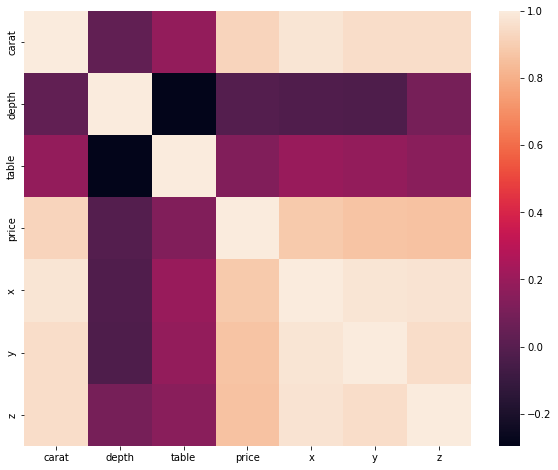

In [6]:
plt.subplots(figsize=(10, 8))
sns.heatmap(df2.corr())

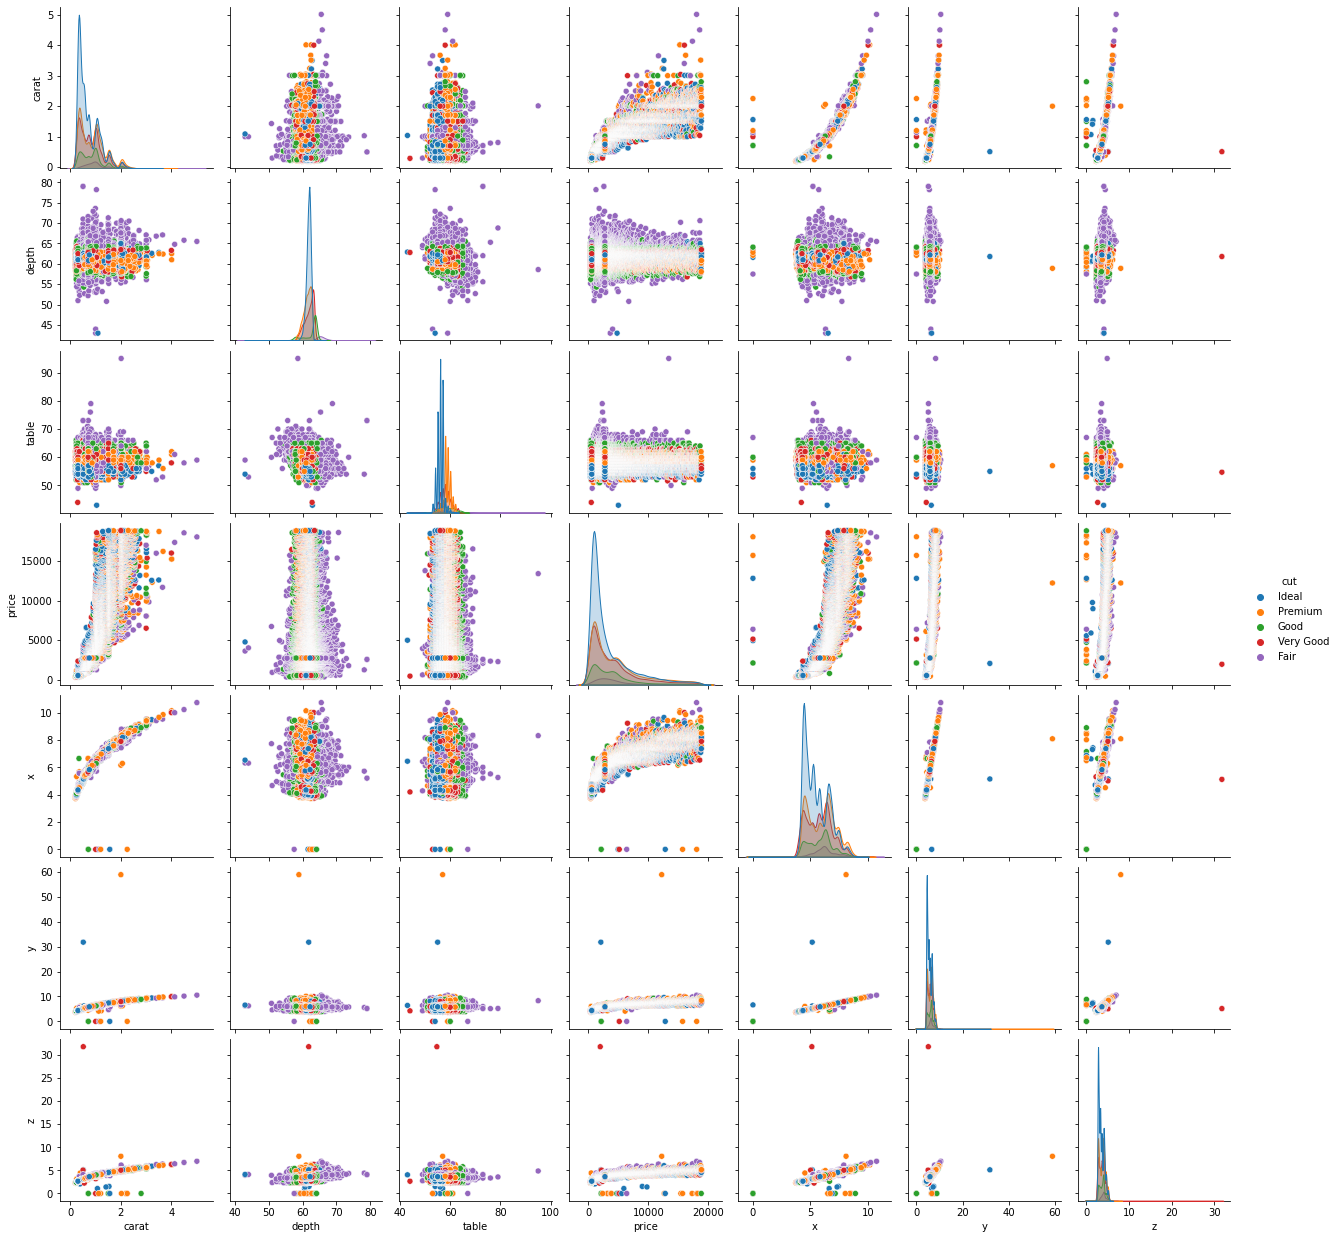

In [7]:
sns.pairplot(df2,hue='cut')

In [8]:
clarity_dict = {"IF" : 7, "VVS1": 6, "VVS2" : 5, "VS1" : 4, "VS2" : 3, "SI1" : 2, "SI2" : 1, "I1" : 0}

df2['clarity'].replace(clarity_dict, inplace=True)
df2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,1,61.0,58.0,2757,6.15,6.12,3.74


In [9]:
df2 = pd.get_dummies(df2, columns =['cut', 'color'])
df2

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,1,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0
1,0.21,2,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0
2,0.23,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0
3,0.29,3,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0
4,0.31,1,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,0,0,1,0,0,0,0,0,0
53936,0.72,2,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,0,0,1,0,0,0,0,0,0
53937,0.70,2,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,0,1,1,0,0,0,0,0,0
53938,0.86,1,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,1,0,0,0,0,0,1,0,0


In [10]:
numeric_features = ['carat', 'table', 'depth', 'x', 'y', 'z','price']

data = df2[numeric_features]
data

,carat,table,depth,x,y,z,price
0,0.23,55.0,61.5,3.95,3.98,2.43,326
1,0.21,61.0,59.8,3.89,3.84,2.31,326
2,0.23,65.0,56.9,4.05,4.07,2.31,327
3,0.29,58.0,62.4,4.20,4.23,2.63,334
4,0.31,58.0,63.3,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...
53935,0.72,57.0,60.8,5.75,5.76,3.50,2757
53936,0.72,55.0,63.1,5.69,5.75,3.61,2757
53937,0.70,60.0,62.8,5.66,5.68,3.56,2757
53938,0.86,58.0,61.0,6.15,6.12,3.74,2757


In [11]:
x=data.iloc[:,0:6]
y=data.iloc[:,6:7]

In [12]:
x

,carat,table,depth,x,y,z
0,0.23,55.0,61.5,3.95,3.98,2.43
1,0.21,61.0,59.8,3.89,3.84,2.31
2,0.23,65.0,56.9,4.05,4.07,2.31
3,0.29,58.0,62.4,4.20,4.23,2.63
4,0.31,58.0,63.3,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,57.0,60.8,5.75,5.76,3.50
53936,0.72,55.0,63.1,5.69,5.75,3.61
53937,0.70,60.0,62.8,5.66,5.68,3.56
53938,0.86,58.0,61.0,6.15,6.12,3.74


In [13]:
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=50)

In [15]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_train_scaled=Scaler.fit_transform(x_train)
x_test_scaled=Scaler.fit_transform(x_test)
x_train_scaled

array([[ 0.4267059 , -1.1000293 ,  2.34450341,  0.47192764,  0.43119073,
         0.76559109],
       [-0.56469772, -1.54878698,  0.31523791, -0.4822237 , -0.43914541,
        -0.4430471 ],
       [-1.02875899,  0.24624371, -1.4341289 , -1.18669057, -1.1180076 ,
        -1.29197154],
       ...,
       [-0.60688511, -0.20251396,  0.73508594, -0.54464481, -0.55228911,
        -0.4718242 ],
       [-0.56469772, -0.20251396,  1.43483267, -0.56247942, -0.53488239,
        -0.39988145],
       [ 0.82748608,  1.59251672,  0.66511127,  0.89104084,  0.80543527,
         0.95264224]])

# Linear Regression

In [16]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train_scaled, y_train)

y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train R^2 Score: {train_r2:.2f}')
print(f'Test R^2 Score: {test_r2:.2f}')
y_train_pred 
y_test_pred

Train R^2 Score: 0.86
Test R^2 Score: 0.86


array([[ 1600.90683127],
       [14112.09457503],
       [ 5685.04449298],
       ...,
       [  883.74222292],
       [ 7183.94812415],
       [ 1867.80972324]])

# lasso Regression

In [17]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.8) 

lasso_model.fit(x_train_scaled, y_train)

# Predict on the training and test data
y_train_pred = lasso_model.predict(x_train_scaled)
y_test_pred = lasso_model.predict(x_test_scaled)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


print(f'Train R^2 Score: {train_r2:.2f}')
print(f'Test R^2 Score: {test_r2:.2f}')


Train R^2 Score: 0.86
Test R^2 Score: 0.86


# Ridge Regression

In [18]:
from sklearn.linear_model import Ridge


# Create a Ridge regression model
ridge_model = Ridge(alpha=0.1)  # alpha is the regularization strength


ridge_model.fit(x_train_scaled, y_train)

y_train_pred = ridge_model.predict(x_train_scaled)
y_test_pred = ridge_model.predict(x_test_scaled)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train R^2 Score: {train_r2:.2f}')
print(f'Test R^2 Score: {test_r2:.2f}')

Train R^2 Score: 0.86
Test R^2 Score: 0.86


# Multi layer neural network

In [19]:
from sklearn.neural_network import MLPRegressor



# Create an MLP regression model
mlp_model = MLPRegressor(hidden_layer_sizes=(12,12,12), activation='relu', solver='adam', 
                         alpha=0.001, batch_size='auto', learning_rate='constant', 
                         max_iter=20000, random_state=0)

# Fit the model on the training data
mlp_model.fit(x_train_scaled, y_train)

# Predict on the training and test data
y_train_pred = mlp_model.predict(x_train_scaled)
y_test_pred = mlp_model.predict(x_test_scaled)

# Evaluate the model

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


print(f'Train R^2 Score: {train_r2:.2f}')
print(f'Test R^2 Score: {test_r2:.2f}')


C:\Users\YOGESH\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train R^2 Score: 0.87
Test R^2 Score: 0.86


In [20]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=0.1),
    'MLP Regression': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', 
                                   alpha=0.001, max_iter=1000, random_state=0)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_test_pred = model.predict(x_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    results[name] = {'RMSE': rmse, 'R^2': r2}

# Print results
print('Model Comparison Results:')
for name, result in results.items():
    print(f'{name}:')
    print(f'  RMSE: {result["RMSE"]:.2f}')
    print(f'  R^2 Score: {result["R^2"]:.2f}')
    print()


C:\Users\YOGESH\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Comparison Results:
Linear Regression:
  RMSE: 1494.03
  R^2 Score: 0.86

Lasso Regression:
  RMSE: 1493.88
  R^2 Score: 0.86

Ridge Regression:
  RMSE: 1494.03
  R^2 Score: 0.86

MLP Regression:
  RMSE: 1459.42
  R^2 Score: 0.87

